# Figure 6

### Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from karabo_data import RunDirectory

In [2]:
run = RunDirectory('../data//SA1/201830/p900025/raw/r0149/')

In [3]:
df = run.get_dataframe(fields=[("*_XGM/*", "*.i[xy]Pos"), ("*_XGM/*", "*.photonFlux")])

In [4]:
def plot_fig(dataframe, axis, xkey, ykey, xlabel, ylabel, xlim, ylim, verbose=True):
    x = dataframe[xkey].values
    y = dataframe[ykey].values
    
    coef = np.polyfit(x, y, deg=1)
    linear_fit = np.poly1d(coef)
    
    if verbose:
        print(f"Slope: {coef[0]:.3f}, offset: {coef[1]:.3f}")
    
    axis.scatter(x, y, color='red', s=1)
    axis.set_xlabel(xlabel, fontsize=14)
    axis.set_ylabel(ylabel, fontsize=14)

    axis.plot(x, linear_fit(x), color='black')

    #  Formatting
    axis.set_xlim(*xlim)
    axis.set_ylim(*ylim)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.minorticks_on()

### Left

Slope: 3.775, offset: -9.961


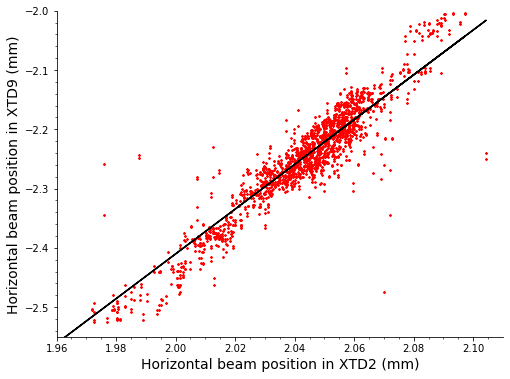

In [5]:
fig_6L, ax_6L = plt.subplots(figsize=(8,6))
plot_fig(df, ax_6L,
    xkey='SA1_XTD2_XGM/XGM/DOOCS/beamPosition.ixPos', ykey='SPB_XTD9_XGM/XGM/DOOCS/beamPosition.ixPos',
    xlabel="Horizontal beam position in XTD2 (mm)", ylabel="Horizontal beam position in XTD9 (mm)",
    xlim=(1.96, 2.11), ylim=(-2.55, -2.0)
)

### Right

Slope: 2.453, offset: 1.323


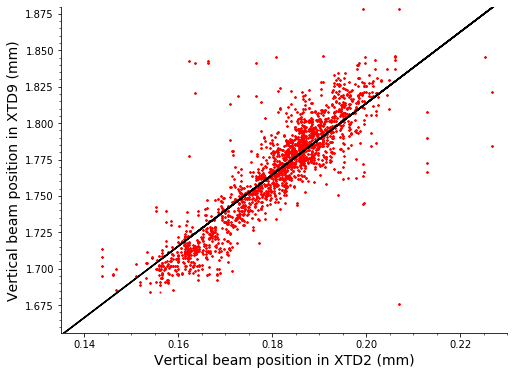

In [6]:
fig_6R, ax_6R = plt.subplots(figsize=(8,6))
plot_fig(df, ax_6R,
    xkey='SA1_XTD2_XGM/XGM/DOOCS/beamPosition.iyPos', ykey='SPB_XTD9_XGM/XGM/DOOCS/beamPosition.iyPos',
    xlabel="Vertical beam position in XTD2 (mm)", ylabel="Vertical beam position in XTD9 (mm)",
    xlim=(0.135, 0.230), ylim=(1.656, 1.880)
)

## Figure

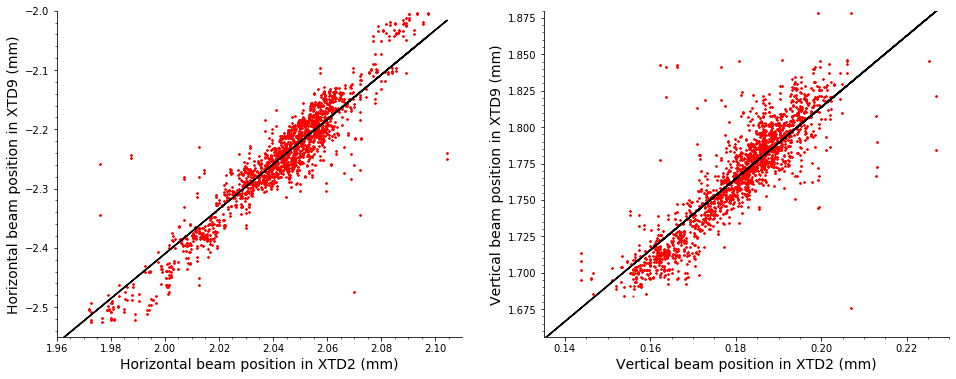

In [7]:
fig, (ax_6L, ax_6R) = plt.subplots(1,2, figsize=(16, 6))

plot_fig(df, ax_6L,
    xkey='SA1_XTD2_XGM/XGM/DOOCS/beamPosition.ixPos', ykey='SPB_XTD9_XGM/XGM/DOOCS/beamPosition.ixPos',
    xlabel="Horizontal beam position in XTD2 (mm)", ylabel="Horizontal beam position in XTD9 (mm)",
    xlim=(1.96, 2.11), ylim=(-2.55, -2.0), verbose=False
)

plot_fig(df, ax_6R,
    xkey='SA1_XTD2_XGM/XGM/DOOCS/beamPosition.iyPos', ykey='SPB_XTD9_XGM/XGM/DOOCS/beamPosition.iyPos',
    xlabel="Vertical beam position in XTD2 (mm)", ylabel="Vertical beam position in XTD9 (mm)",
    xlim=(0.135, 0.230), ylim=(1.656, 1.880), verbose=False
)

Simultaneous beam position measurements for the SASE1 beam at XTD2 and XTD9 XGM.

Horizontal (left graph) and vertical (right graph) beam position correlations are shown. The horizontal and vertical slope of the linear fits are 3.8 and 2.5, respectively. 

Data sources are XTD2 and XTD9 XGMs (SASE1), averaged ion signals of XGMDh and XGMDv chambers, date 15 June 2018, wavelength 0.134 nm, 60 pulses per train, both XGMs with Xe gas targets. The distance between the SASE1 source point and XTD2 and XTD9 XGM is 209 m and 878 m, respectively.
